In [1]:
import sys
#!{sys.executable} -m pip install numpy
#!{sys.executable} -m pip install cv2
#!{sys.executable} -m pip install matplotlib.pyplot
!{sys.executable} -m pip install pydicom
!{sys.executable} -m pip install scikit-image
import numpy as np
import cv2
import pydicom
import matplotlib.pyplot as plt
from skimage.filters import (threshold_otsu,sobel, threshold_triangle, threshold_niblack, threshold_sauvola)
from skimage import img_as_ubyte

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.0 MB/s eta 0:00:00


In [2]:
def make_jan(image, janelamento: list):
        """Janelamento : Lista com o valor mínimo e máximo de janela, transforma esse valor em um array numpy"""
        min_valor = min(janelamento)
        max_valor = max(janelamento)
        imagem_janelada = np.copy(image)
        imagem_janelada[image < min_valor] = min_valor
        imagem_janelada[image > max_valor] = max_valor
        return imagem_janelada

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Leitura da imagem

In [4]:
path =  r"/content/drive/MyDrive/PIM/Dicom/Paciente51 (13).dcm"
img_dc = pydicom.dcmread(path)

Leitura de imagem

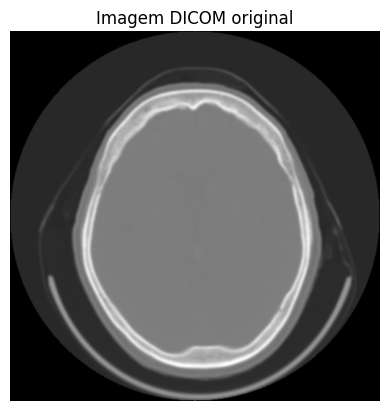

In [21]:
plt.figure(0)
plt.title('Imagem DICOM original')
plt.imshow(img_dc.pixel_array, cmap = "gray")
plt.gca().set_axis_off()

(array([57116., 81845.,  7842.,  3260., 84809.,  7297.,  6884.,  7161.,
         5030.,   900.]),
 array([-1500. , -1188.1,  -876.2,  -564.3,  -252.4,    59.5,   371.4,
          683.3,   995.2,  1307.1,  1619. ]),
 <BarContainer object of 10 artists>)

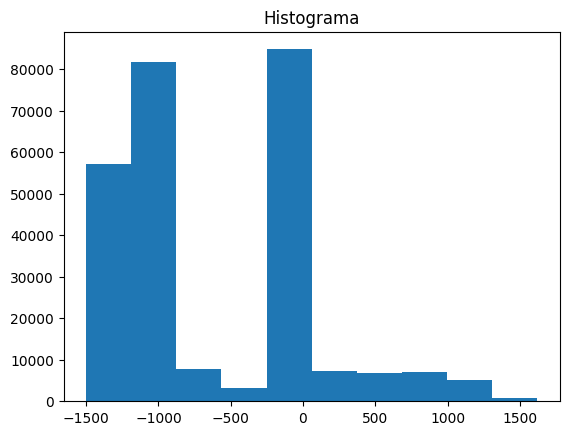

In [22]:
plt.figure(2)
plt.title('Histograma')
plt.hist(img_dc.pixel_array.ravel())

(array([[510.,   2.,   0., ...,   0.,   0.,   0.],
        [466.,  46.,   0., ...,   0.,   0.,   0.],
        [448.,  64.,   0., ...,   0.,   0.,   0.],
        ...,
        [448.,  64.,   0., ...,   0.,   0.,   0.],
        [466.,  46.,   0., ...,   0.,   0.,   0.],
        [510.,   2.,   0., ...,   0.,   0.,   0.]]),
 array([-1500. , -1188.1,  -876.2,  -564.3,  -252.4,    59.5,   371.4,
          683.3,   995.2,  1307.1,  1619. ]),
 <a list of 512 BarContainer objects>)

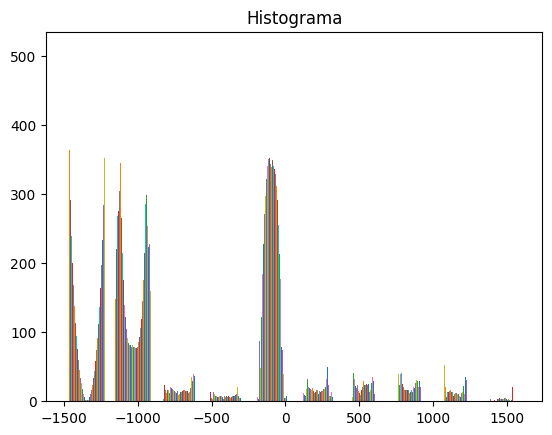

In [23]:
plt.figure(3)
plt.title('Histograma')
plt.hist(img_dc.pixel_array)

imagem com janelamento
imagem com janelamento 2


(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.62033e+05, 0.00000e+00, 3.13000e+02,
        0.00000e+00, 3.54000e+02, 0.00000e+00, 3.68000e+02, 0.00000e+00,
        4.04000e+02, 0.00000e+00, 4.26000e+02, 0.00000e+00, 4.51000e+02,
        0.00000e+00, 4.88000e+02, 0.00000e+00, 5.10000e+02, 0.00000e+00,
        5.61000e+02, 0.00000e+00, 7.13000e+02, 0.00000e+00, 8.57000e+02,
        0.00000e+00, 1.05000e+03, 0.00000e+00, 1.40600e+03, 0.00000e+00,
        1.81500e+03, 0.00000e+00, 2.40100e+03, 0.00000e+00, 3.26600e+03,
        0.00000e+00, 3.71400e+03, 0.00000e+00, 4.34700e+03, 0.00000e+00,
        4.83600e+03, 0.00000e+00, 5.11500e+03, 0.00000e+00, 5.30500e+03,
        0.00000e+00, 5.16900e+03, 0.00000e+00, 4.85900e+03, 0.00000e+00,
        4.58200e+03, 0.00000e+00, 4.18900e+03, 0.00

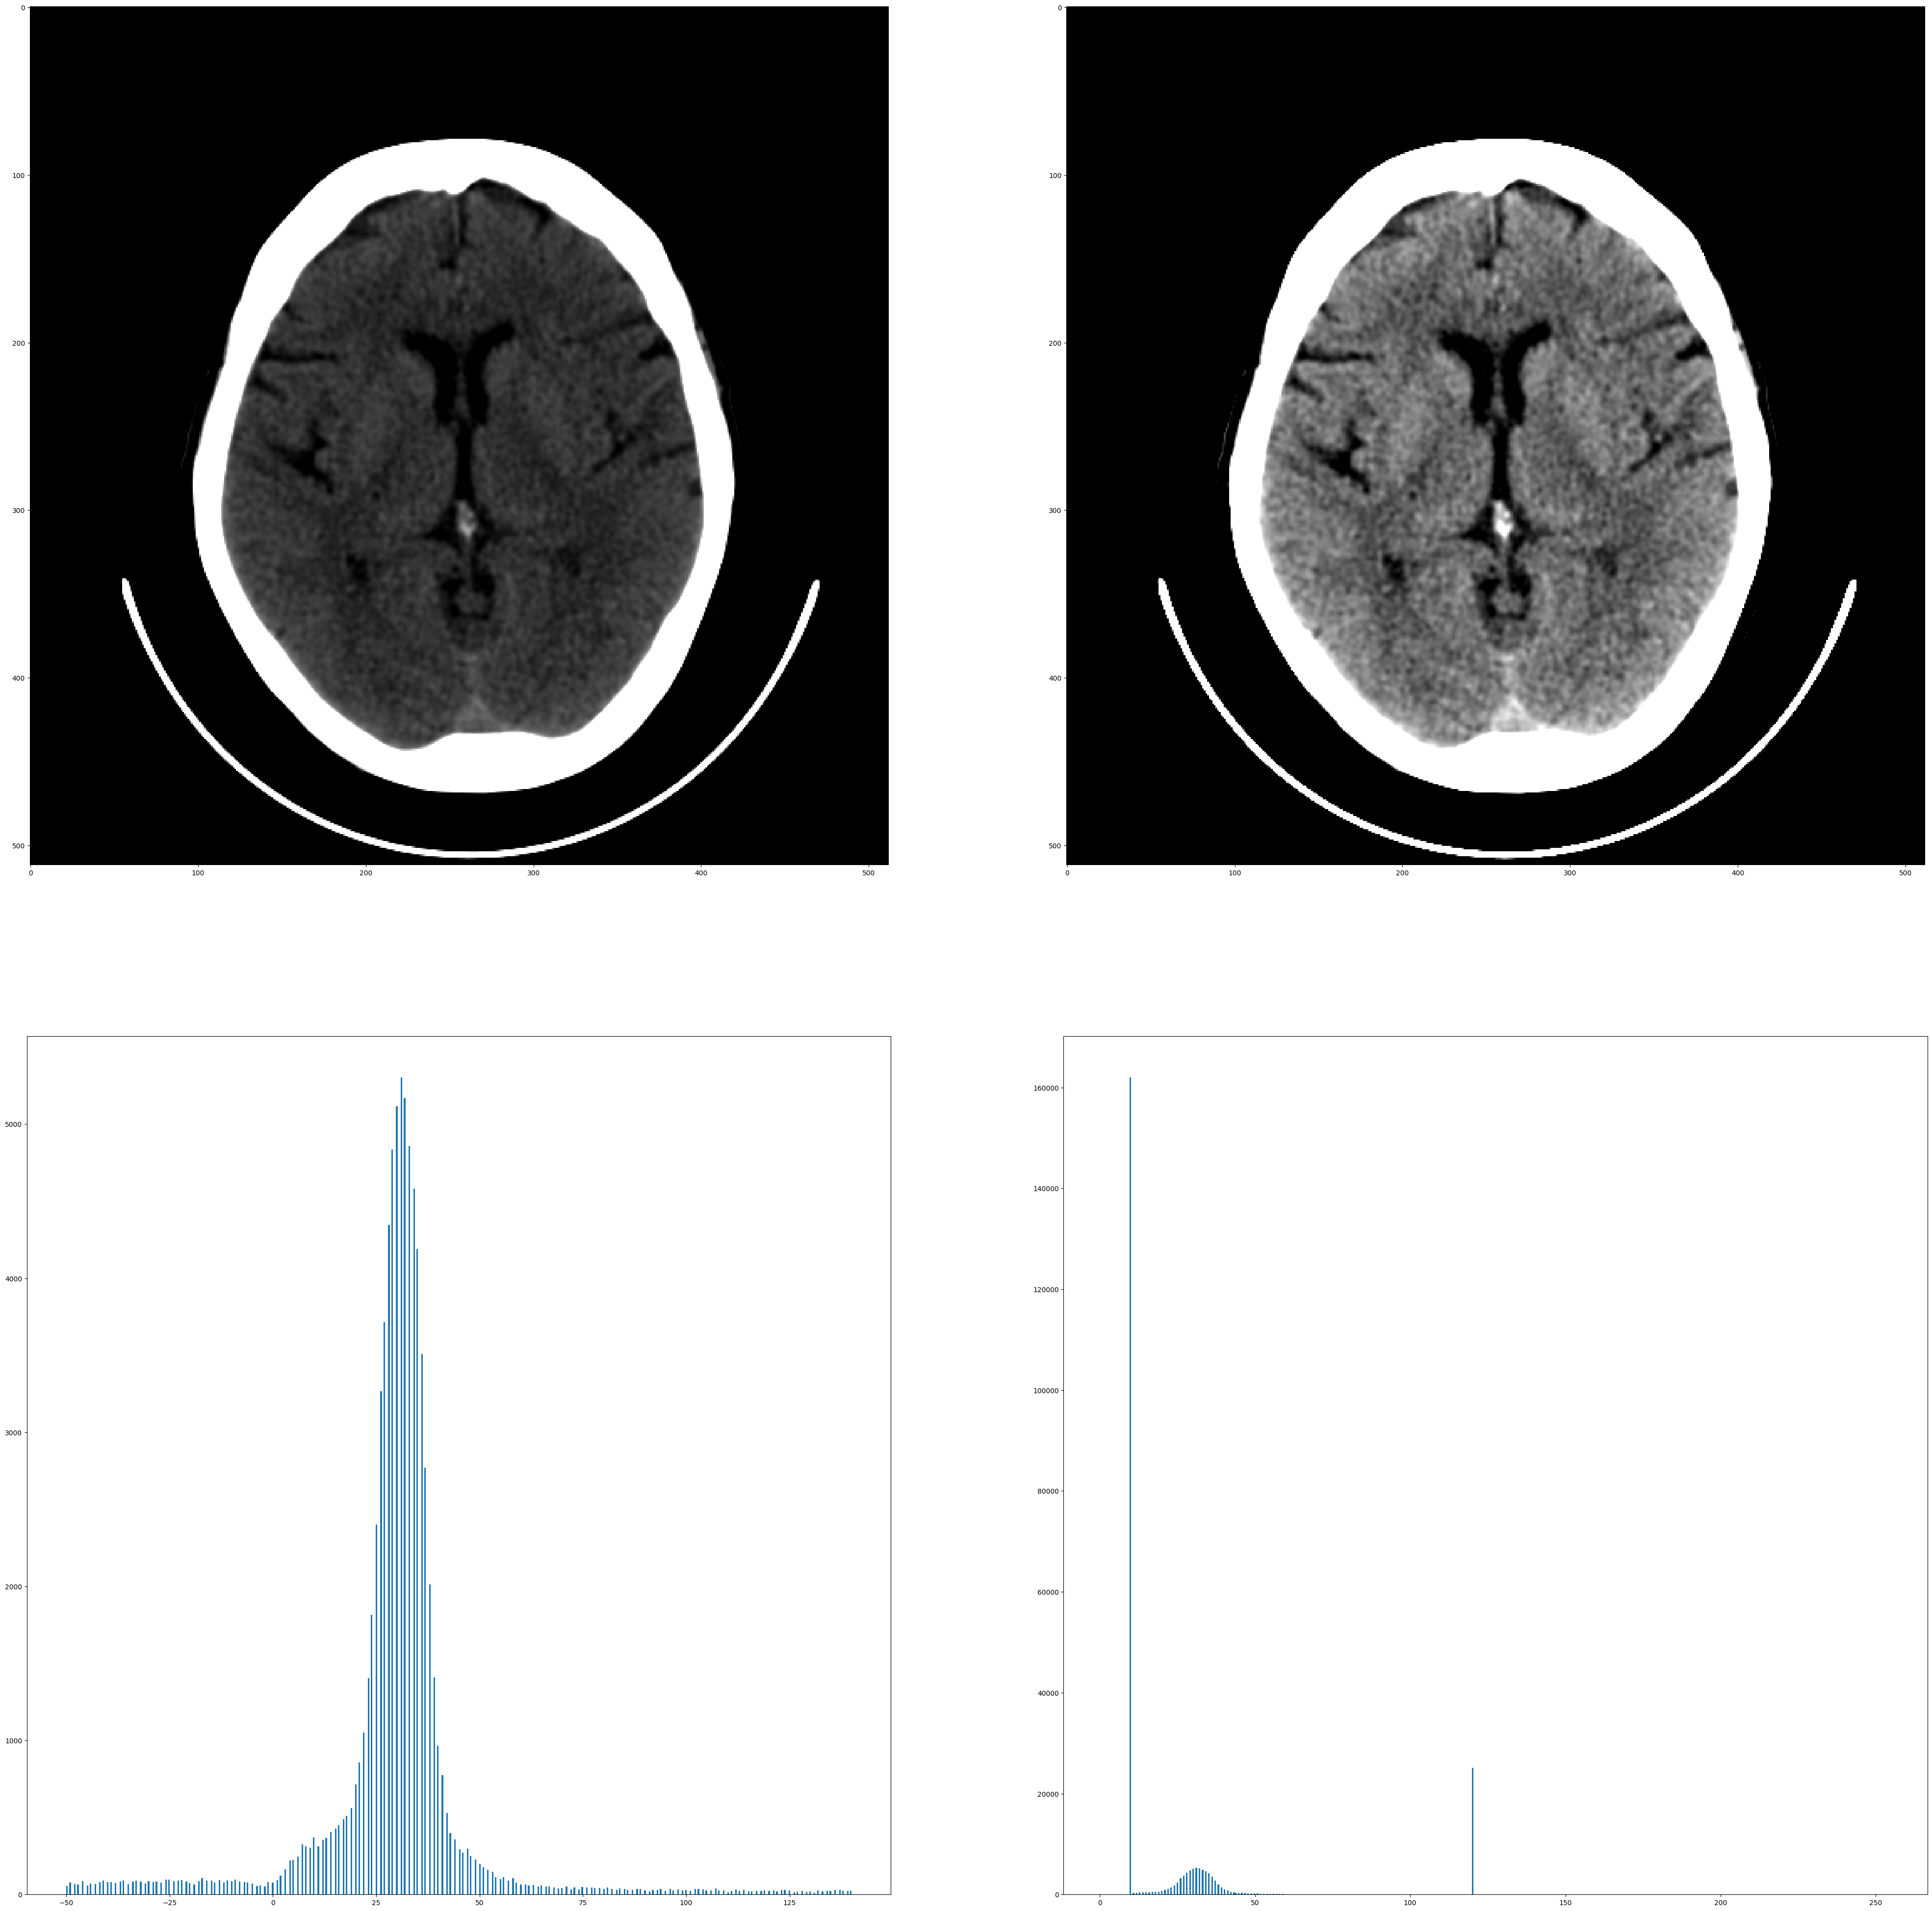

In [5]:
fig,ax = plt.subplots(2,2,figsize = (50,50))

janelamento = [10,120]
img_jan = make_jan(image = img_dc.pixel_array,janelamento = janelamento)
print("imagem com janelamento")
ax[0,0].imshow(img_jan,cmap = "gray")
ax[1,0].hist(img_dc.pixel_array.ravel(),500,[-50,140])


#janelamento2

janelamento2 = [10,60]
img_jan2 = make_jan(image = img_dc.pixel_array,janelamento = janelamento2)
print("imagem com janelamento 2")
ax[0,1].imshow(img_jan2,cmap = "gray")
ax[1,1].hist(img_jan.ravel(),500,[1,254])

(array([166621.,  34112.,  30764.,   2779.,    896.,    500.,    426.,
           329.,    327.,  25390.]),
 array([ 10.,  21.,  32.,  43.,  54.,  65.,  76.,  87.,  98., 109., 120.]),
 <BarContainer object of 10 artists>)

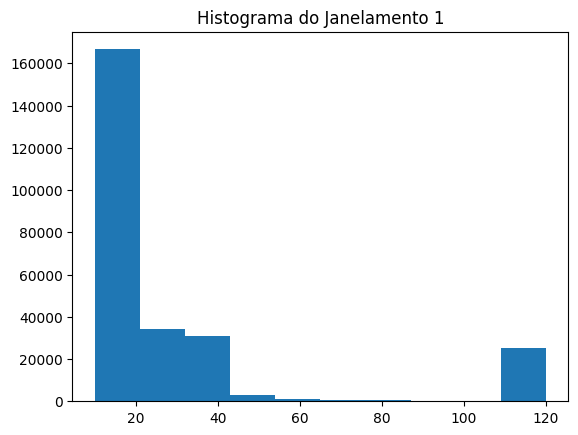

In [25]:
plt.figure(4)
plt.title('Histograma do Janelamento 1')
plt.hist(img_jan.ravel())

(array([163472.,   2436.,   5841.,  18564.,  25030.,  13887.,   3025.,
          1338.,    796.,  27755.]),
 array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60.]),
 <BarContainer object of 10 artists>)

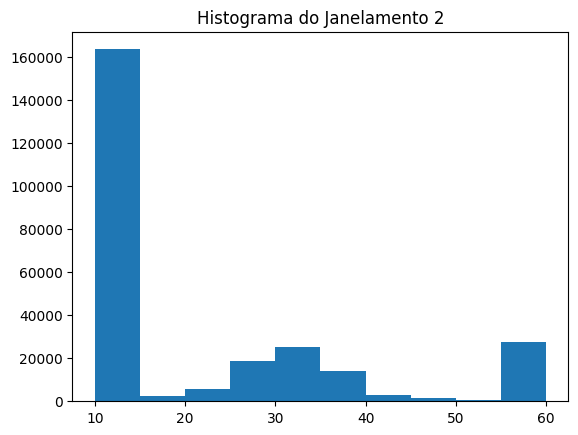

In [26]:
plt.figure(5)
plt.title('Histograma do Janelamento 2')
plt.hist(img_jan2.ravel())

In [6]:
janelamento

[10, 120]

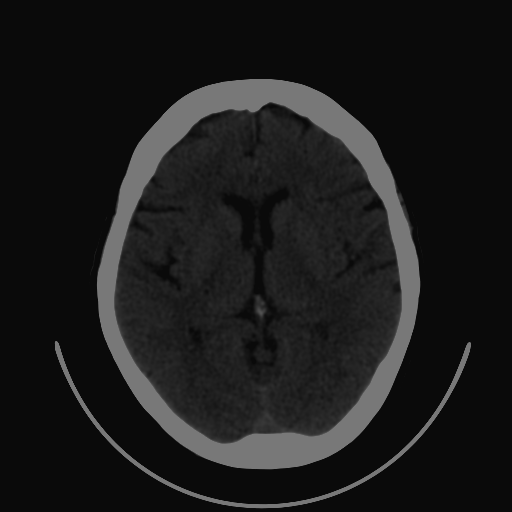

In [7]:
from google.colab.patches import cv2_imshow
np.max(img_jan)
#print(img_jan.shape())
# The image is already grayscale, no need for conversion
# gray = cv2.cvtColor(img_jan, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_jan) # Added a window title

## Limiar com otsu

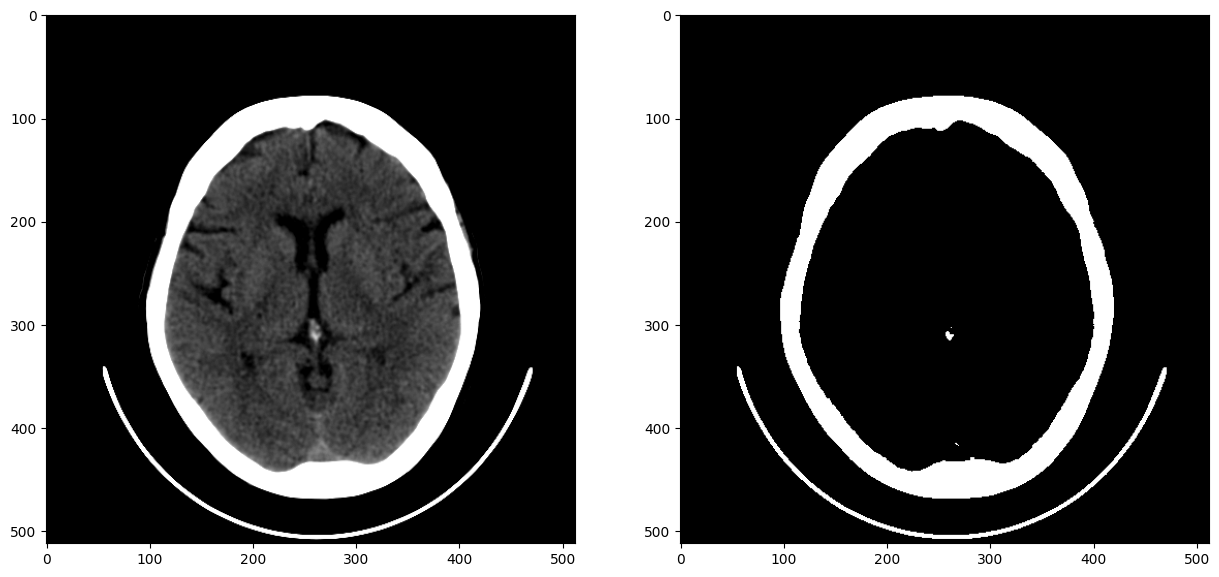

In [8]:
img = img_jan

janelamento_otsu = np.arange(10,100)
img_jan_otsu = make_jan(image = img_dc.pixel_array,janelamento = janelamento_otsu)
thresh_otsu = threshold_otsu(img_jan_otsu)
binary_img_1 = img_jan_otsu > thresh_otsu
binary_img_1 = img_as_ubyte(binary_img_1)
fig,ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(img_jan_otsu,cmap = "gray")
ax[1].imshow(binary_img_1,cmap = "gray")

### Sobel

(array([  56.,    0.,   78.,    0.,    0.,   69.,    0.,   65.,    0.,
           0.,   88.,    0.,    0.,   59.,    0.,   72.,    0.,    0.,
          68.,    0.,    0.,   81.,    0.,   91.,    0.,    0.,   81.,
           0.,   79.,    0.,    0.,   73.,    0.,    0.,   83.,    0.,
          90.,    0.,    0.,   68.,    0.,    0.,   85.,    0.,   91.,
           0.,    0.,   85.,    0.,    0.,   71.,    0.,   87.,    0.,
           0.,   82.,    0.,   83.,    0.,    0.,   76.,    0.,    0.,
          96.,    0.,   97.,    0.,    0.,   87.,    0.,    0.,   91.,
           0.,   92.,    0.,    0.,   85.,    0.,   74.,    0.,    0.,
          66.,    0.,    0.,   88.,    0.,  107.,    0.,    0.,   90.,
           0.,    0.,   91.,    0.,   77.,    0.,    0.,   92.,    0.,
           0.,   77.,    0.,   91.,    0.,    0.,   87.,    0.,   97.,
           0.,    0.,   85.,    0.,    0.,   79.,    0.,   76.,    0.,
           0.,   70.,    0.,    0.,   56.,    0.,   57.,    0.,    0.,
      

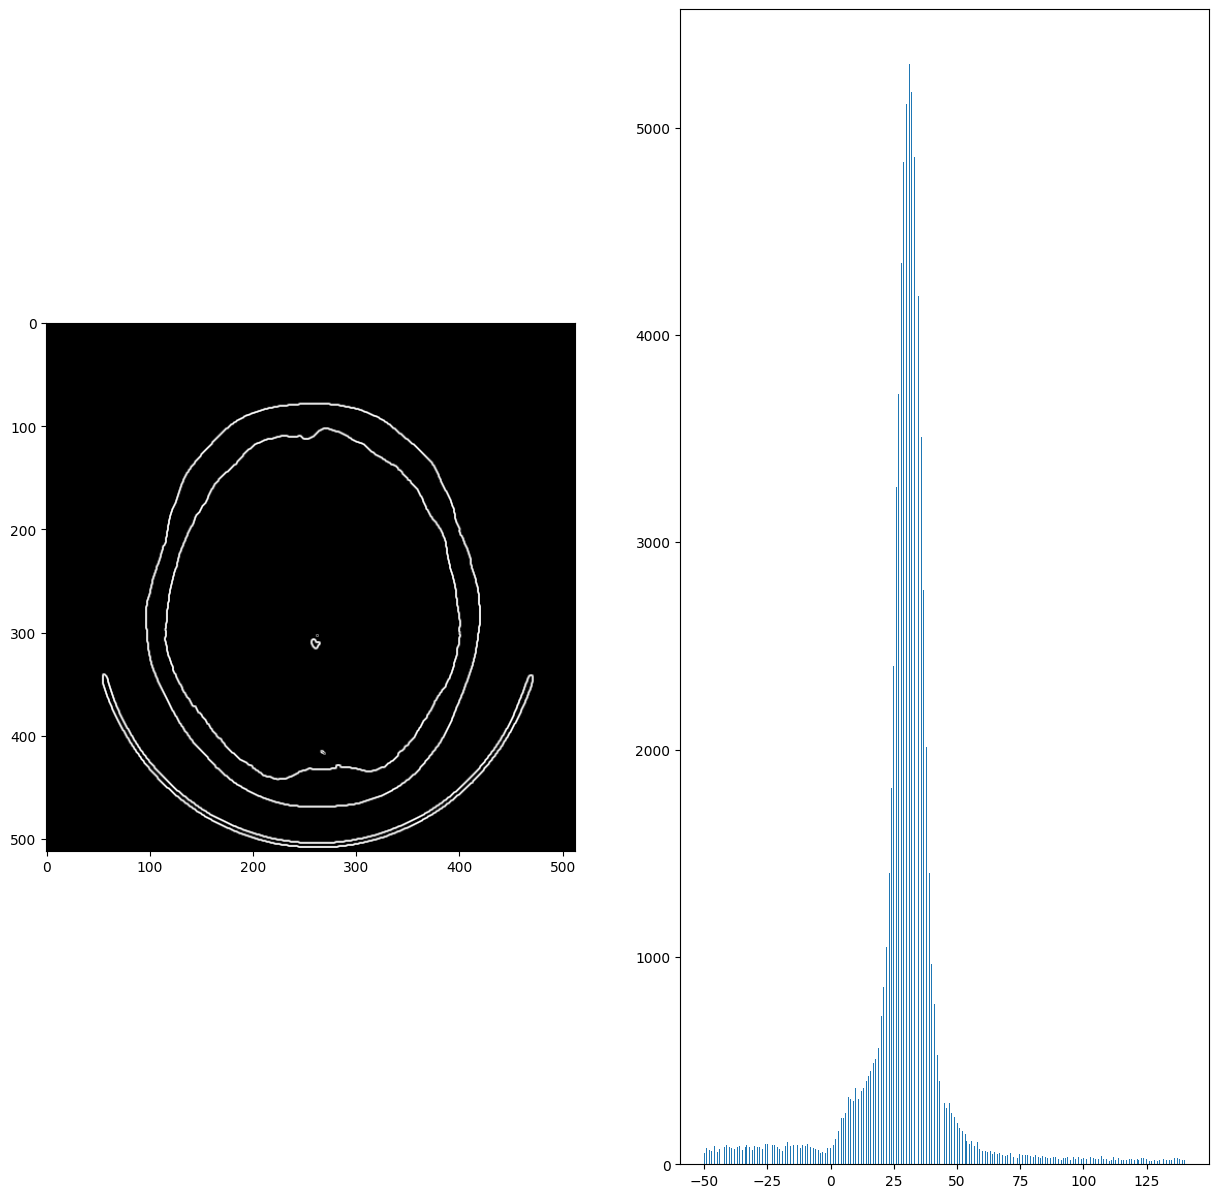

In [9]:
edges = sobel(binary_img_1)
fig,ax = plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(edges,cmap = "gray")
ax[1].hist(img_dc.pixel_array.ravel(),500,[-50,140])

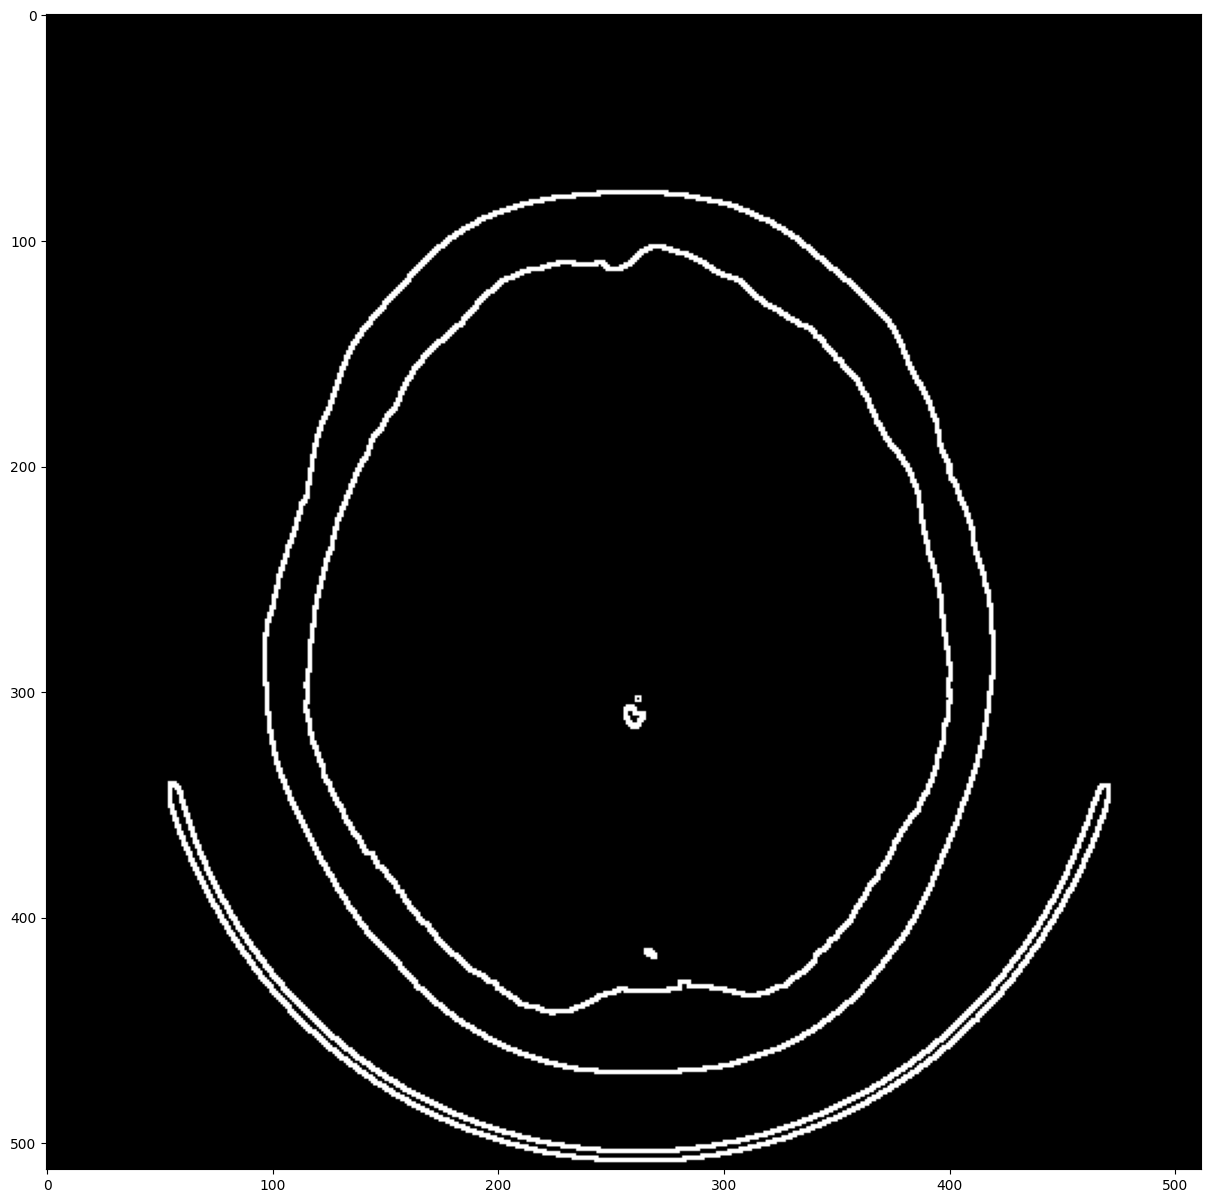

In [10]:
arraynp = np.where(edges >=0.25,1,0)
fig,ax = plt.subplots(figsize=(15,15))
ax.imshow(arraynp,cmap = "gray")

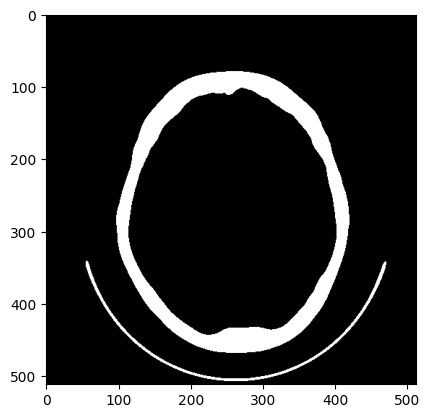

In [11]:
img_2 = pydicom.dcmread(path).pixel_array

#limiarização binária com limiar 230
_, img_2_th = cv2.threshold(img_2, 100, 1000, cv2.THRESH_BINARY)
plt.imshow(img_2_th, cmap="gray")

### Floodfill e bitwise na região interna

imagem original com otsu
imagem com floodfill
imagem com floodfill invertido


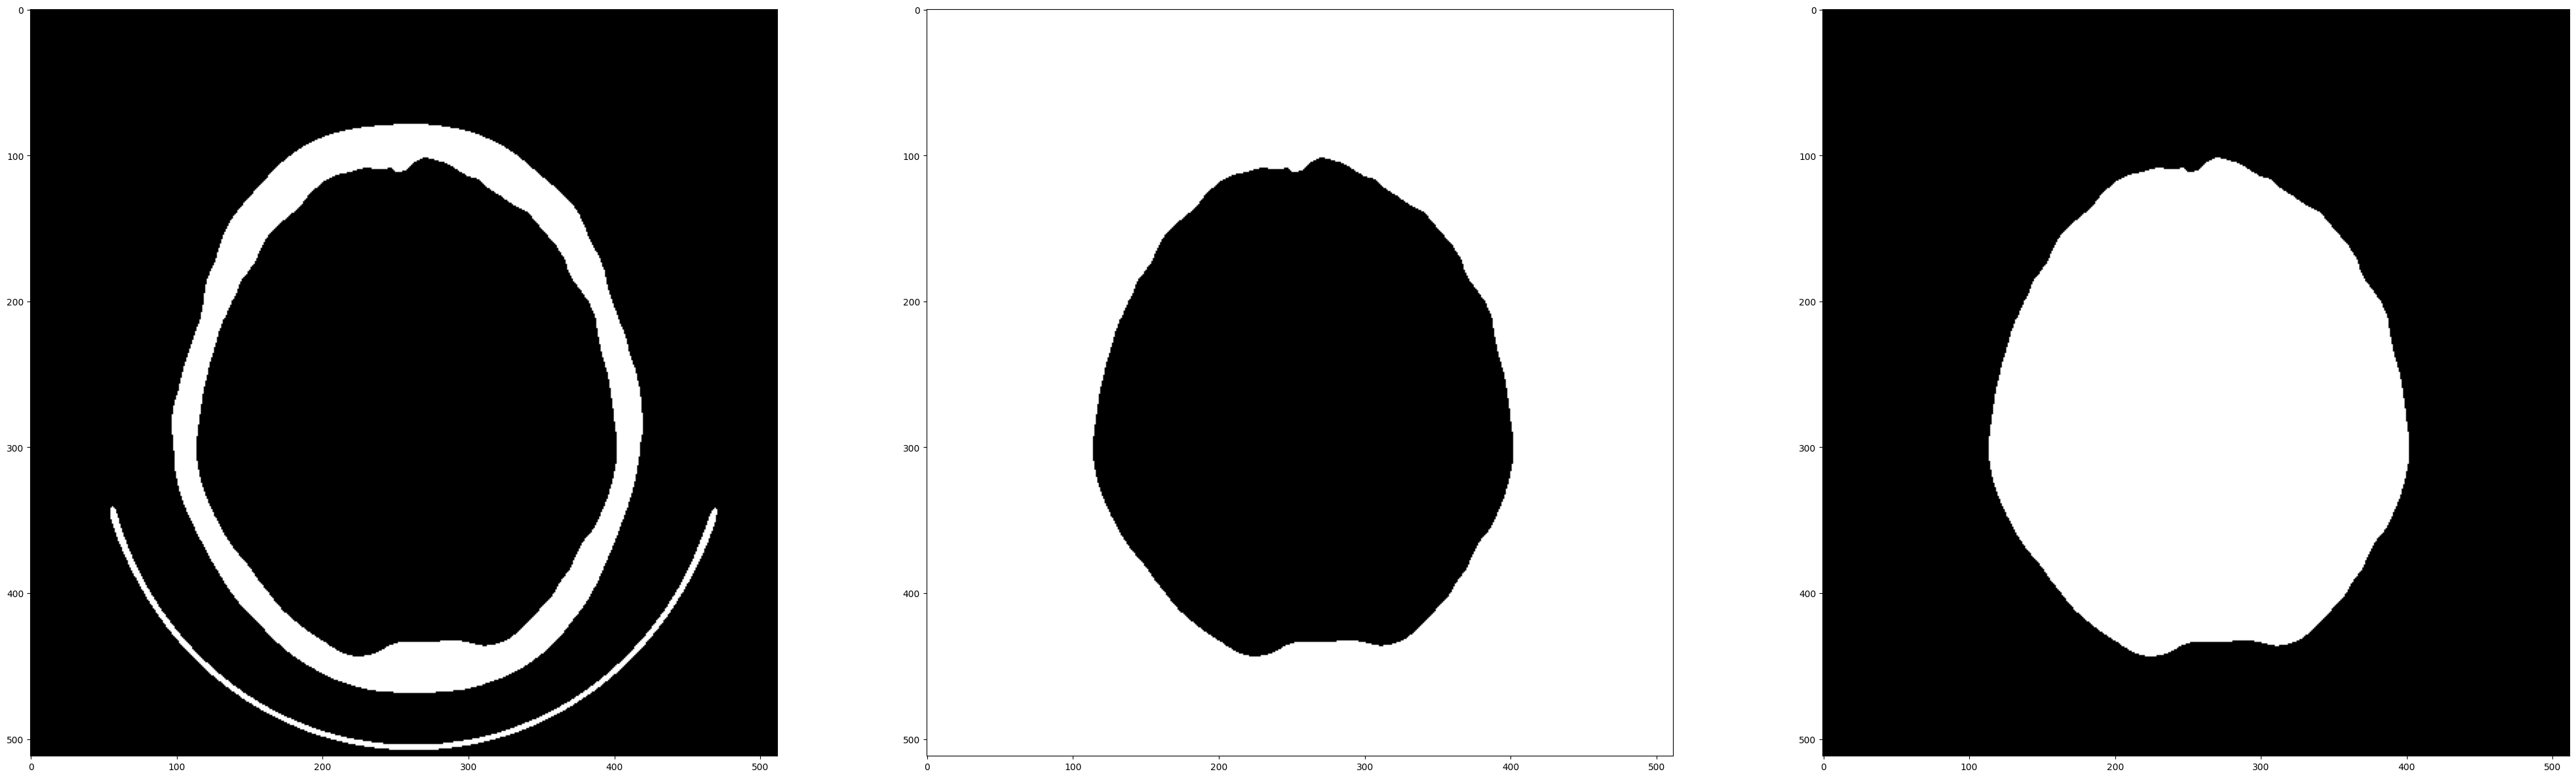

In [16]:
im_floodfill = make_jan(image=img_2_th, janelamento=np.arange(0, 256))
# im_floodfill = make_jan(image = img_2_th, janelamento = np.arange(0,1001))
im_floodfill = im_floodfill.astype(np.uint8)

# máscara para aplicação do floodfill
h, w = img_2_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

# preenchimento externo
img_out=cv2.floodFill(im_floodfill, mask, (0,0), (255,255,255));

# inversão da imagem
im_floodfill_inv = cv2.bitwise_not(im_floodfill)

fig,ax = plt.subplots(1,3,figsize=(50,50))
print("imagem original com otsu")
ax[0].imshow(img_2_th,cmap = "gray")
print("imagem com floodfill")
ax[1].imshow(im_floodfill,cmap = "gray")
print("imagem com floodfill invertido")
ax[2].imshow(im_floodfill_inv,cmap = "gray")

In [13]:
mask.shape

(514, 514)

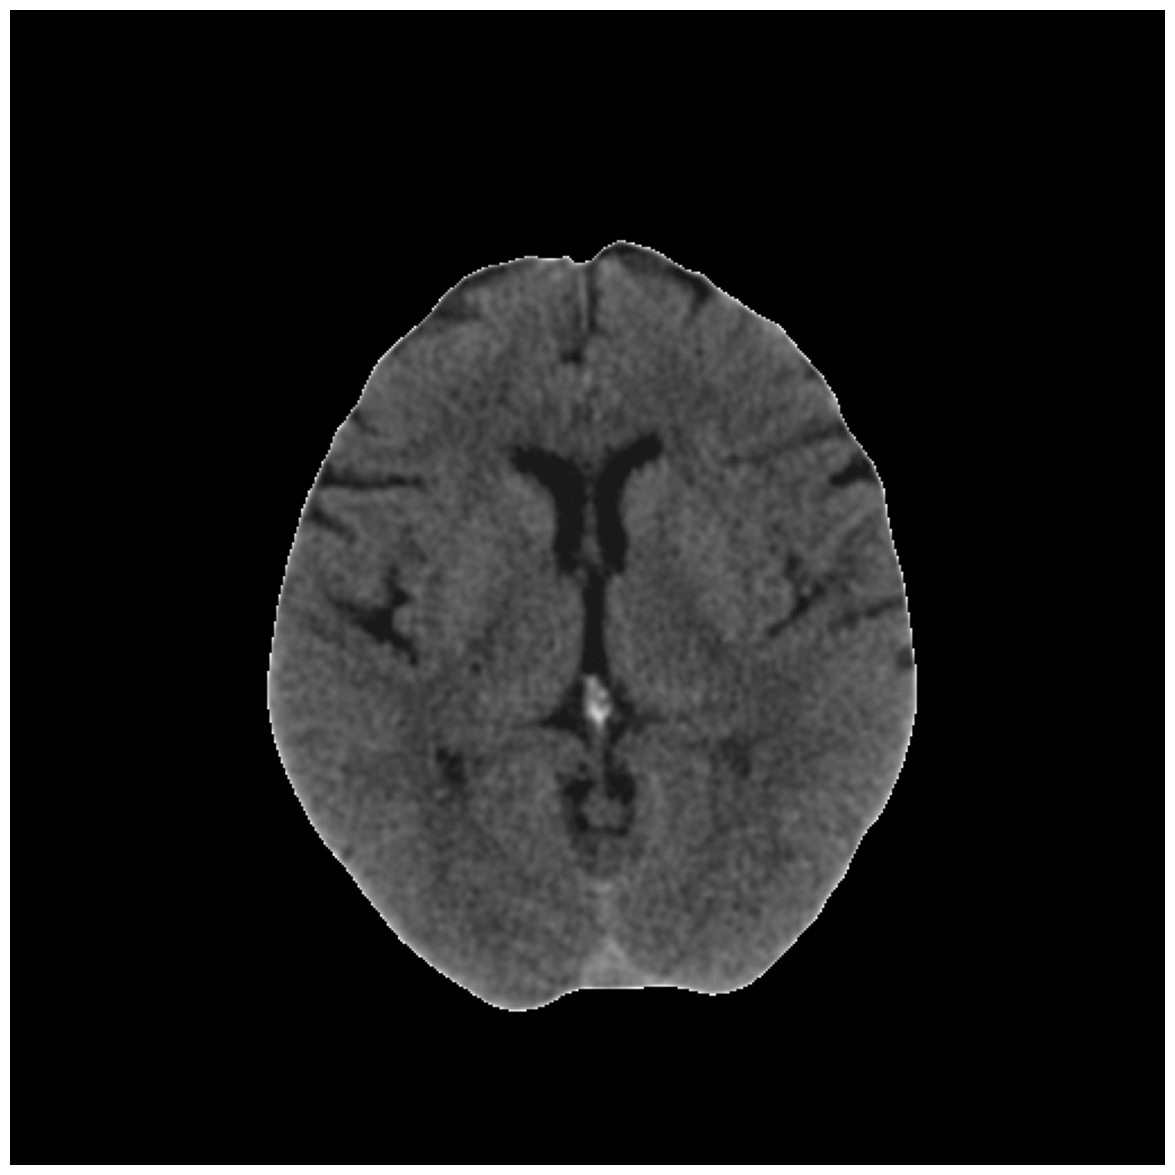

In [14]:
img_pat = img_jan*im_floodfill_inv
ig,ax = plt.subplots(figsize=(15,15))
ax.imshow(img_pat,cmap = "gray")
plt.gca().set_axis_off()

### Média de kernel
5x5

In [17]:
media = cv2.blur(img_jan,(5,5))
media_list = []
for x in media:
    for y in x:
        if y not in media_list:
            media_list.append(y)
media

array([[10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       ...,
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10],
       [10, 10, 10, ..., 10, 10, 10]], dtype=int16)

## Remoçao de ventrículo